# In-class K-means

In [1]:
import numpy as np
import pylab as pl
import time
from IPython.display import display, clear_output
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(333)

In [3]:
random_1 = np.random.randn(2,100)

In [4]:
random_1.shape

(2, 100)

In [5]:
random_2 = np.random.randn(2,100) + 2

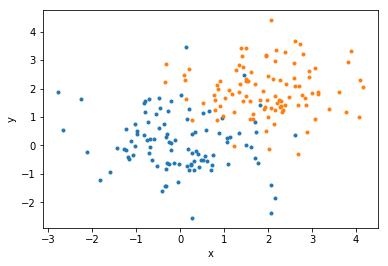

In [6]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.xlabel('x')
pl.ylabel('y');

#### Figure 1. This figure shows the plot of the two synthetic data sets.

# 1. chose the number of clusters 
nclusters = 2

In [7]:
random_stack = np.hstack([random_1, random_2])

# 2. set a guess for the initial centers

In [8]:
# fix the centers to a poor initial guess
centers = np.array([[0.,-1.], [0,-2]]) 

# a better initial guess would have been
#minval, maxval = min(random_stack[0]), max(random_stack[0])
#np.array((np.random.rand(4)   * (maxval - minval)) + minval).reshape(2,2)

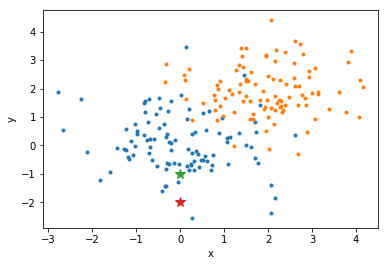

In [9]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.plot(centers[0,0], centers[0,1], '*', ms=10)
pl.plot(centers[1,0], centers[1,1], '*', ms=10)
pl.xlabel('x')
pl.ylabel('y');

#### Figure 2. This figure shows the plot of the two synthetic data sets along withe the two initial center points for K-means clustering.

In [10]:
#define the distance metric - just Eucledian distance
def distmetric(x, y, center):
    distmetric = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distmetric

# 3. check for each point which center is closer

In [11]:
cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

# 4. calculate new centers

In [ ]:
newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
print ("old center\n", centers, "\nnew center\n", newc)

old center
 [[ 0. -1.]
 [ 0. -2.]] 
new center
 [[ 0.96972306  1.06522176]
 [ 1.02400655 -2.10176012]]


# 5. iterate 3&4 till convergence + animation

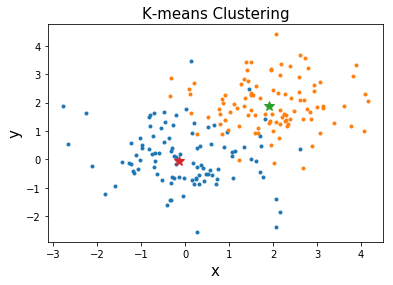

old center
 [[ 1.90521904  1.88827286]
 [-0.14843    -0.05983864]] 
new center
 [[  1.96325332e+00   1.90823820e+00]
 [ -1.26103718e-01   1.20148998e-04]]


In [ ]:
fig,ax = plt.subplots()

l1, = ax.plot(random_1[0], random_1[1], '.')
l2, = ax.plot(random_2[0], random_2[1], '.')
l3, = ax.plot(newc[0,0], newc[0,1], '*', ms=10)
l4, = ax.plot(newc[1,0], newc[1,1], '*', ms=10)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('K-means Clustering', fontsize=15)

iter = 0
while ((not (centers == newc).all()) or iter>10):

    centers = newc
    
    
    l1.set_data(random_1[0], random_1[1])
    l2.set_data(random_2[0], random_2[1])
    l3.set_data(centers[0,0], centers[0,1])
    l4.set_data(centers[1,0], centers[1,1])
    
    cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
    cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

    newc = np.array([np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
                     np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    
    time.sleep(1)
    clear_output(wait=True)
    display(fig) 
    
    iter+=1
    plt.show()
    print ("old center\n", centers, "\nnew center\n", newc)
    

#### Figure 3. This figure shows the two centers as determined by K-means clustering for the our two synthetic data sets.

## ASH Score 100